Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'TRX'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-12,0.002447,0.001711,0.002051,0.001988,4.851200e+04,0.001988
2017-09-13,0.002479,0.001298,0.002006,0.001427,5.877000e+04,0.001427
2017-09-14,0.001831,0.001091,0.001419,0.001801,2.647500e+04,0.001801
2017-09-15,0.017671,0.001371,0.001815,0.001831,5.453500e+04,0.001831
2017-09-16,0.003879,0.001781,0.001836,0.003320,1.249980e+05,0.003320
...,...,...,...,...,...,...
2021-06-16,0.073949,0.068789,0.068928,0.073822,1.048499e+09,0.073822
2021-06-17,0.074762,0.068363,0.073897,0.069584,1.070084e+09,0.069584
2021-06-18,0.070253,0.068437,0.069623,0.068722,7.676872e+08,0.068722


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1374 entries, 2017-09-12 to 2021-06-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1374 non-null   float64
 1   Low        1374 non-null   float64
 2   Open       1374 non-null   float64
 3   Close      1374 non-null   float64
 4   Volume     1374 non-null   float64
 5   Adj Close  1374 non-null   float64
 6   Spread     1374 non-null   float64
dtypes: float64(7)
memory usage: 85.9 KB


## Plot the closing value of Tron over time

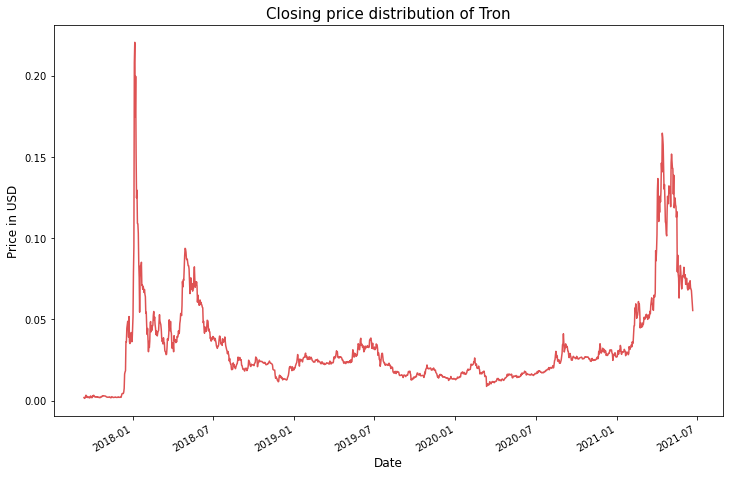

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Tron", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-12,0.002447,0.001711,0.002051,0.001988,4.851200e+04,0.001988
2017-09-13,0.002479,0.001298,0.002006,0.001427,5.877000e+04,0.001427
2017-09-14,0.001831,0.001091,0.001419,0.001801,2.647500e+04,0.001801
2017-09-15,0.017671,0.001371,0.001815,0.001831,5.453500e+04,0.001831
2017-09-16,0.003879,0.001781,0.001836,0.003320,1.249980e+05,0.003320
...,...,...,...,...,...,...
2021-06-16,0.073949,0.068789,0.068928,0.073822,1.048499e+09,0.073822
2021-06-17,0.074762,0.068363,0.073897,0.069584,1.070084e+09,0.069584
2021-06-18,0.070253,0.068437,0.069623,0.068722,7.676872e+08,0.068722


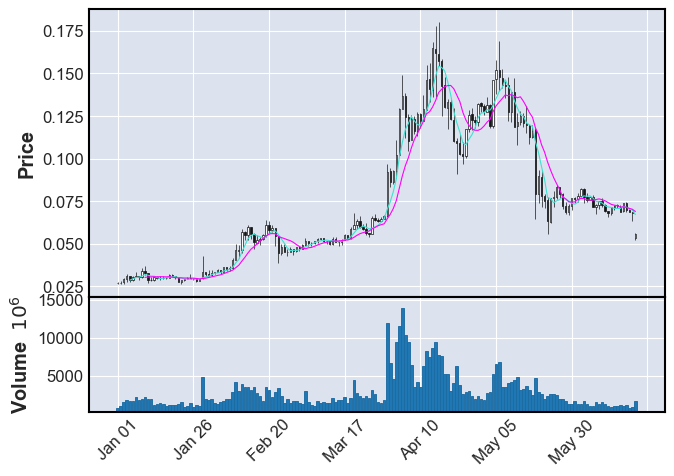

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2021-1-1']
price_predict_df

,ds,y
1203,2021-01-02,0.027219
1204,2021-01-03,0.029495
1205,2021-01-04,0.030853
1206,2021-01-05,0.028632
1207,2021-01-06,0.030515
...,...,...
1369,2021-06-16,0.073822
1370,2021-06-17,0.069584
1371,2021-06-18,0.068722
1372,2021-06-19,0.067833


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
172,2021-06-25,0.056657,0.046590,0.066092
173,2021-06-26,0.055891,0.045598,0.065641
174,2021-06-27,0.054681,0.043731,0.065710
175,2021-06-28,0.054636,0.042610,0.065765
176,2021-06-29,0.051310,0.038546,0.064064


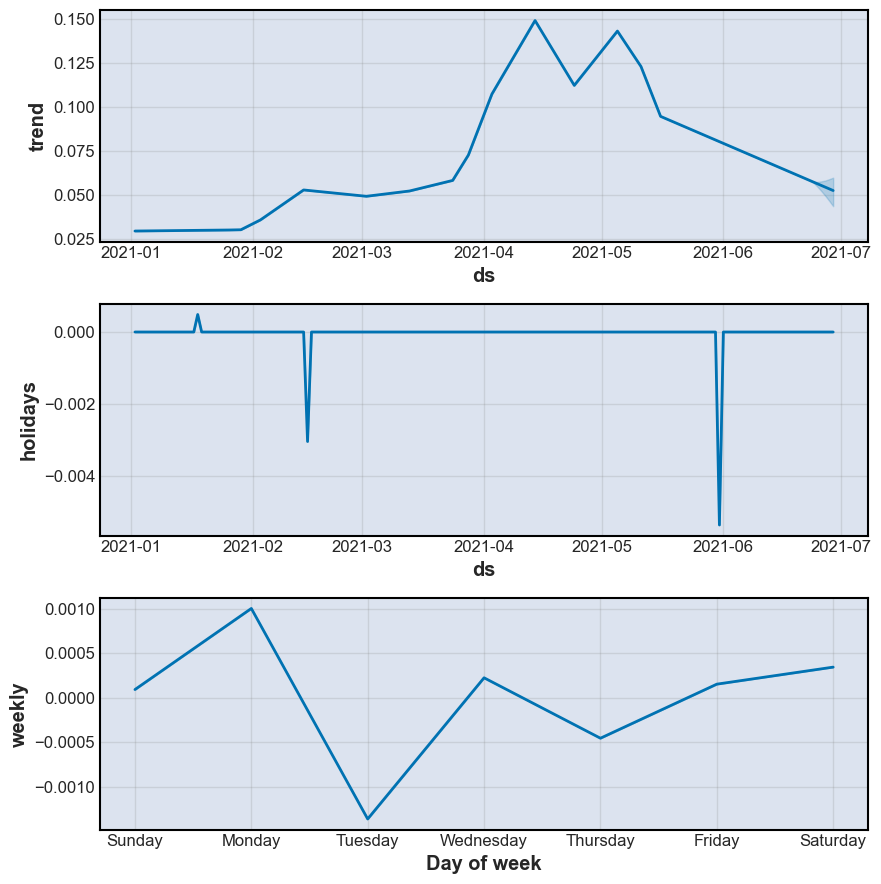

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

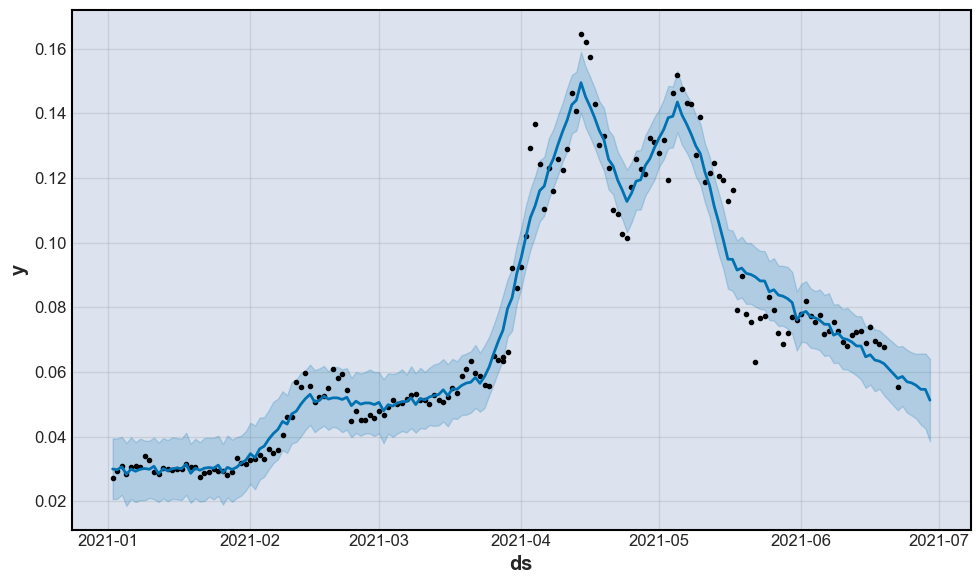

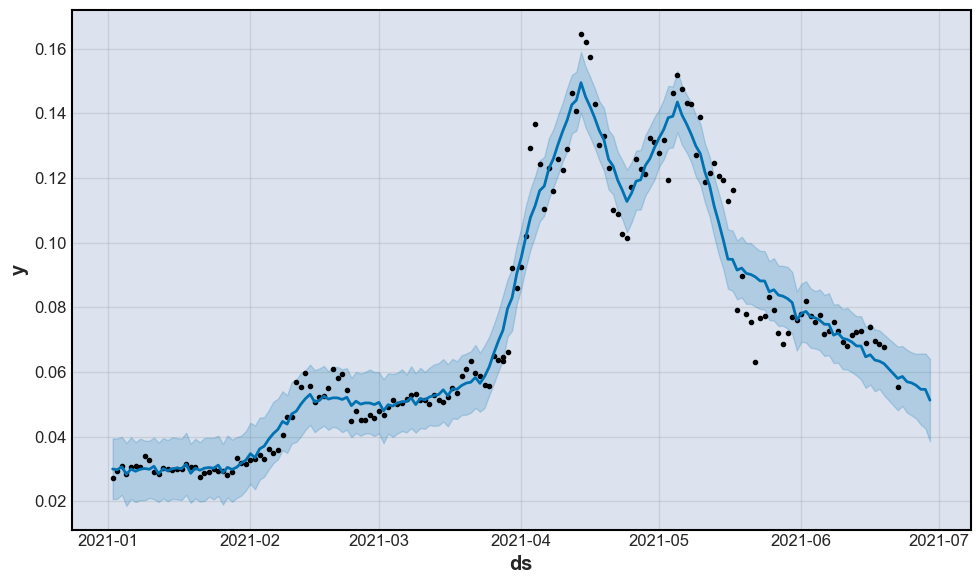

In [10]:
m.plot(forecast)